In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import Counter
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

In [4]:

file_path = r"c:\Users\shvve\.vscode\project 3\Fanshion\fashion-mnist_test.csv"
data = pd.read_csv(file_path, encoding="utf-8") 

In [5]:
# Separate features (X) and labels (y)

X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column is the label

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Shape:", x_train.shape, y_train.shape)
print("Test Shape:", x_test.shape, y_test.shape)

Train Shape: (8000, 784) (8000,)
Test Shape: (2000, 784) (2000,)


In [6]:
# Extract labels (First column)
y_train = data.iloc[:, 0].values  # Correct way to get labels
y_test = data.iloc[:, 0].values  # Correct way to get labels

# Extract features (Remaining 784 columns)
x_train = data.iloc[:, 1:].values  # Image pixel values
x_test = data.iloc[:, 1:].values  # Image pixel values

# Verify unique labels
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:

print(data.head()) 

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [9]:
num_classes = len(np.unique(y_train))
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

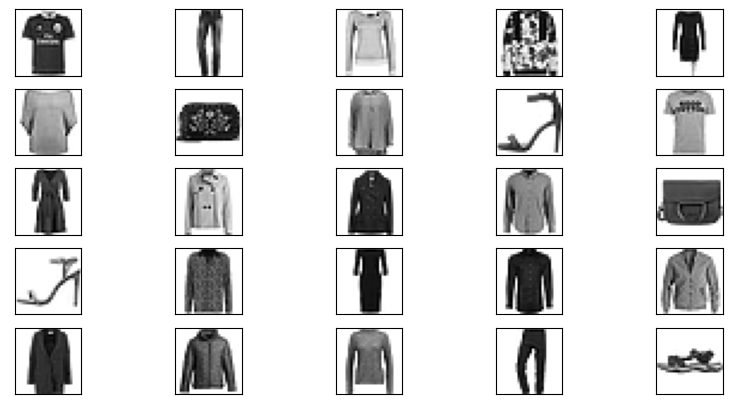

In [12]:
plt.figure(figsize=(10, 5))

for i in range(25):  # Loop through 25 images
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    
    # Reshape the image from (784,) to (28,28)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)

plt.show()

In [13]:
# Dictionary to store one image per class
unique_classes = np.unique(y_test)  # Get all class labels
class_images = {}  # Store images for each class

for i, label in enumerate(y_test):
    if label not in class_images:  # If we haven't stored this class yet
        class_images[label] = x_test[i]  # Save the image
    if len(class_images) == len(unique_classes):  # Stop if we have all classes
        break

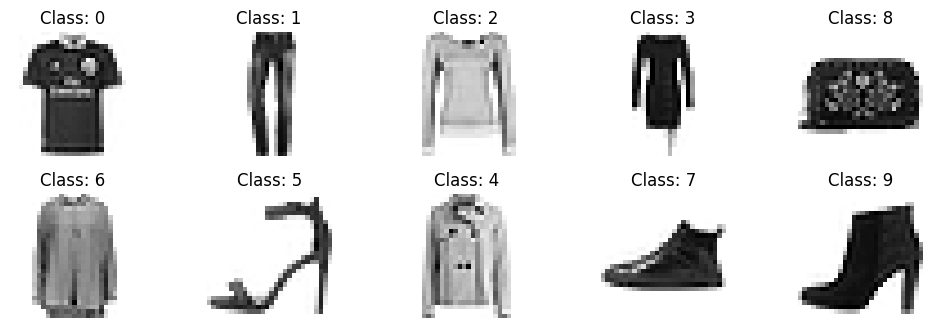

In [14]:
plt.figure(figsize=(10, 5))

for i, (label, img) in enumerate(class_images.items()):
    plt.subplot(3, 5, i + 1)  # Adjust for number of classes
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)  # Reshape if needed
    plt.title(f"Class: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:

model = keras.Sequential(
     [ Flatten(input_shape=(28, 28)),
       Dense(128, activation='relu'),
       #Dense(64, activation='relu'),   # new layer 
       Dense(32, activation='relu'), 
       Dense(10, activation='softmax') ]) 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 0.7865 - accuracy: 0.7237 - val_loss: 0.5119 - val_accuracy: 0.8251
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.8272 - val_loss: 0.4399 - val_accuracy: 0.8481
Epoch 3/40
313/313 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.8470 - val_loss: 0.3802 - val_accuracy: 0.8702
Epoch 4/40
313/313 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8594 - val_loss: 0.3528 - val_accuracy: 0.8735
Epoch 5/40
313/313 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8700 - val_loss: 0.3314 - val_accuracy: 0.8802
Epoch 6/40
313/313 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8701 - val_loss: 0.3047 - val_accuracy: 0.8911
Epoch 7/40
313/313 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8805 - val_loss: 0.2915 - val_accuracy: 0.8941
Epoch 

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9558
Test accuracy: 0.9557999968528748


In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
predicted_label = np.argmax(predictions[0])  # Get the highest probability index
print("Predicted Label:", predicted_label)

Predicted Label: 0


313/313 [==============================] - 0s 1ms/step


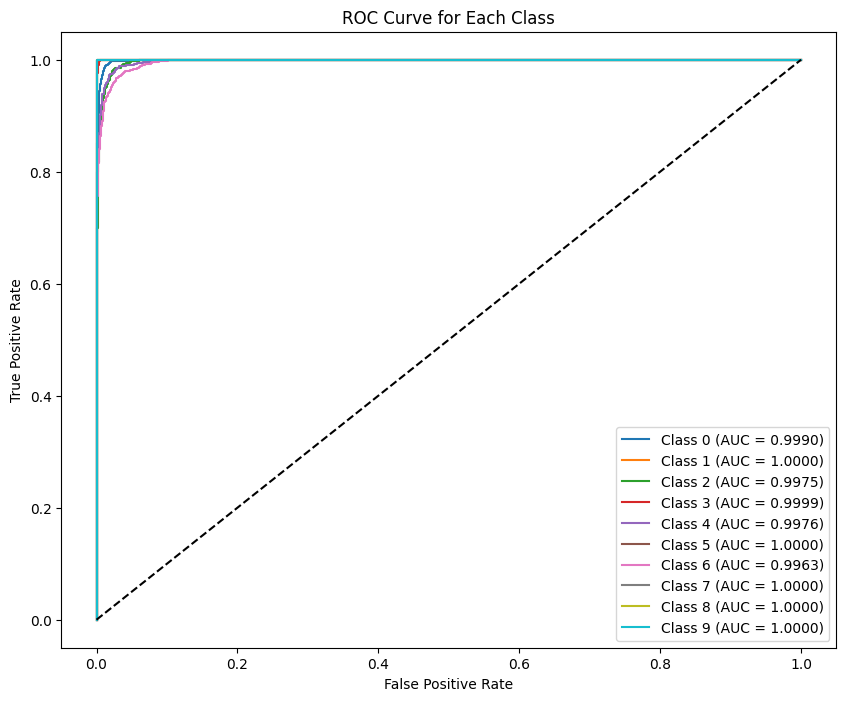

In [21]:
# Convert labels to one-hot encoding
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_probs = model.predict(x_test)
# Create ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(10):  # Loop through all 10 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()

In [22]:
# Get predicted labels (index with highest probability)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Find misclassified examples
misclassified = y_pred_labels != y_test

In [23]:
# Count how many times each class was misclassified
wrong_counts = Counter(y_test[misclassified])

# Find the class with the most mistakes
most_misclassified = max(wrong_counts, key=wrong_counts.get)

print("Images  with the Most Mistakes:", most_misclassified)
print("Images of Mistakes:", wrong_counts[most_misclassified])

# Find the digit with the fewest mistakes
least_misclassified = min(wrong_counts, key=wrong_counts.get)

print("Images with the Least Mistakes:", least_misclassified)
print("Images of Mistakes:", wrong_counts[least_misclassified])

Images  with the Most Mistakes: 6
Images of Mistakes: 193
Images with the Least Mistakes: 3
Images of Mistakes: 2


In [24]:
# Find indices where the true label is 2 but the model predicted something else
misclassified_im_more = np.where((y_test == most_misclassified) & (y_pred_labels != most_misclassified))[0]

# Get the first 20 misclassified "twos"
first_20_more = misclassified_im_more[:20]

print("Indices of first 20 misclassified 6:", first_20_more)

Indices of first 20 misclassified 6: [ 145  305  356  463  580  642  801  819  828  907  920  933 1025 1048
 1097 1101 1113 1114 1131 1222]


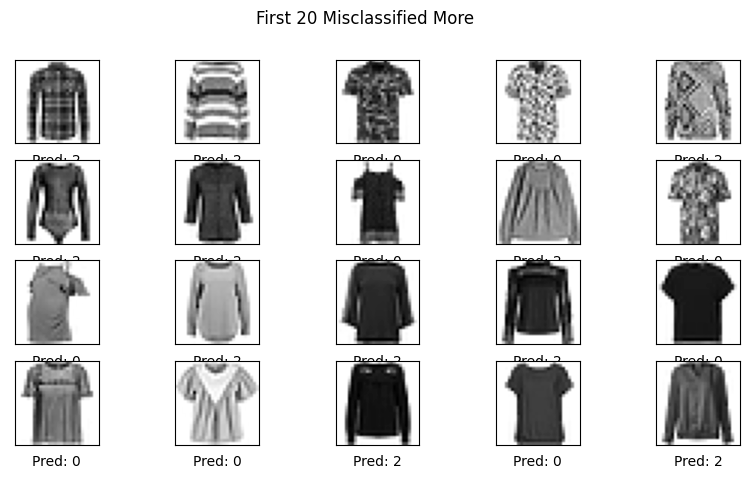

In [25]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(first_20_more):
    plt.subplot(4, 5, i + 1)  # Arrange in 4 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_labels[idx]}")  # Show predicted label

plt.suptitle("First 20 Misclassified More")
plt.show()

In [26]:
# Find indices where the true label is 5 but the model predicted something else
misclassified_less = np.where((y_test == least_misclassified) & (y_pred_labels != least_misclassified))[0]

# Get the first 20 misclassified "twos"
first_6_less = misclassified_less[:20]

print("Indices of first 6 misclassified ones:", first_6_less)

Indices of first 6 misclassified ones: [5232 8933]


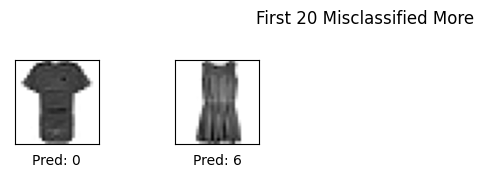

In [27]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(first_6_less):
    plt.subplot(4, 5, i + 1)  # Arrange in 4 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_labels[idx]}")  # Show predicted label

plt.suptitle("First 20 Misclassified More")
plt.show()

In [28]:
# recognition pattern 
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[0 1 2 2 3 2 8 6 5 0 3 4 4 6 8 5 6 3 6 4]
[0 1 2 2 3 2 8 6 5 0 3 4 4 6 8 5 6 3 6 4]


In [29]:
# Wrong results top 25 
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(442, 28, 28)


9 4 2 3 2 
0 2 6 2 2 
3 9 2 3 0 
2 2 3 0 2 
2 2 3 3 2 


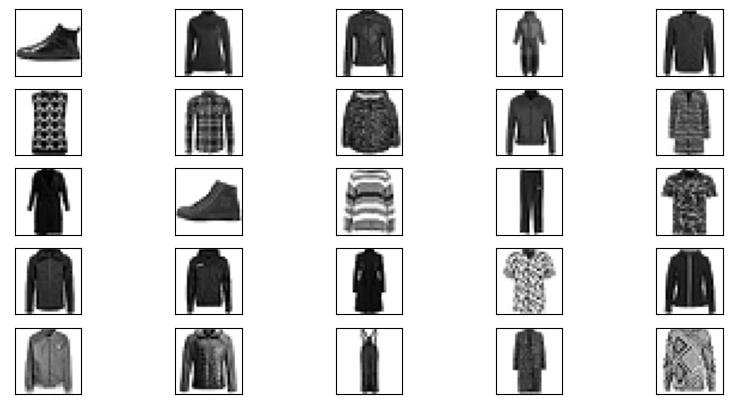

In [30]:
# First 25 wrong results
plt.figure(figsize=(10,5))
for i in range(25):
    print(str(p_false[i]), end=" ")
    if (i + 1) % 5 == 0:  # После каждых 5 чисел перенос строки
        print()
        
for i in range(25):
    # print (" "+str(p_false[i]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

In [31]:
y_pred = model.predict(x_test)  # Predict probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true = np.argmax(y_test_cat, axis=1)

313/313 [==============================] - 0s 1ms/step


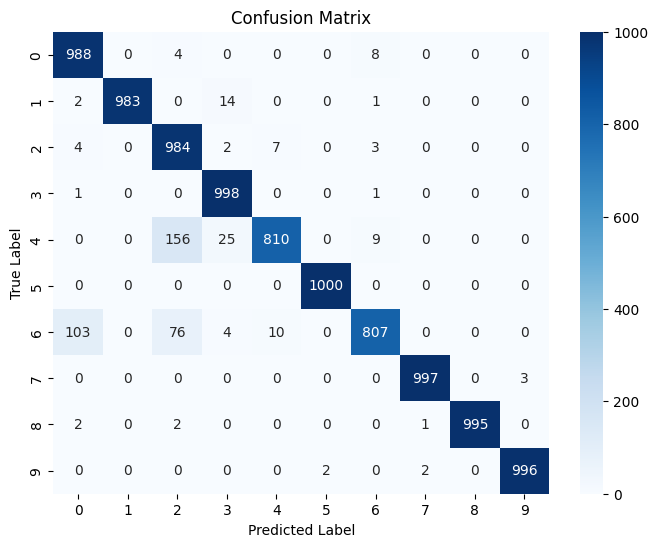

In [32]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.98      0.89      1000
           3       0.96      1.00      0.98      1000
           4       0.98      0.81      0.89      1000
           5       1.00      1.00      1.00      1000
           6       0.97      0.81      0.88      1000
           7       1.00      1.00      1.00      1000
           8       1.00      0.99      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

